<a href="https://colab.research.google.com/github/dianagut1987/visualisations/blob/main/Copy_of_Python_Workshop_Class_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dimensionality reduction

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets


# import some data to play with
iris = datasets.load_iris()
y = iris.target
#print(iris)
print(type(iris))
#print(iris['DESCR'])
print(type(iris['data']))

Automatically created module for IPython interactive environment
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>


([], <a list of 0 Text major ticklabel objects>)

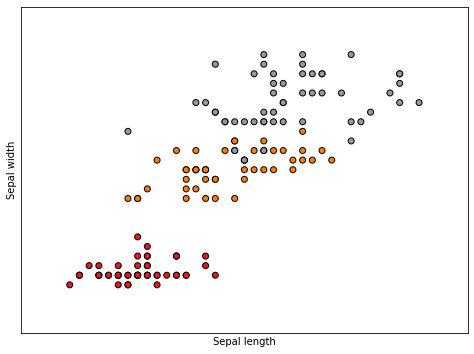

In [ ]:
X = iris.data[:, [0,3]]  # we only take the first two features.

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


{'boxes': [<matplotlib.lines.Line2D at 0x7f2f6eec1630>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2f6ee51048>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2f6ee51ac8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2f6ee51748>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2f716a9ba8>,
  <matplotlib.lines.Line2D at 0x7f2f6ee7b748>]}

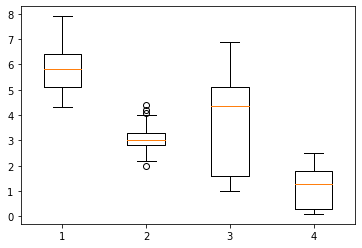

In [ ]:
plt.boxplot(iris.data)

In [ ]:

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
from sklearn.decomposition import PCA
algo=PCA(n_components=4)
algo.fit(iris.data)
print(algo)
print(algo.components_)
print(algo.explained_variance_)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]
[4.22824171 0.24267075 0.0782095  0.02383509]


[4.22824171 0.24267075]


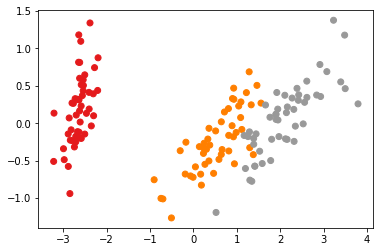

In [ ]:
X_reduced=algo.transform(iris.data)
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y,cmap=plt.cm.Set1)


[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]
[0.92461872 0.05306648 0.01710261]


[]

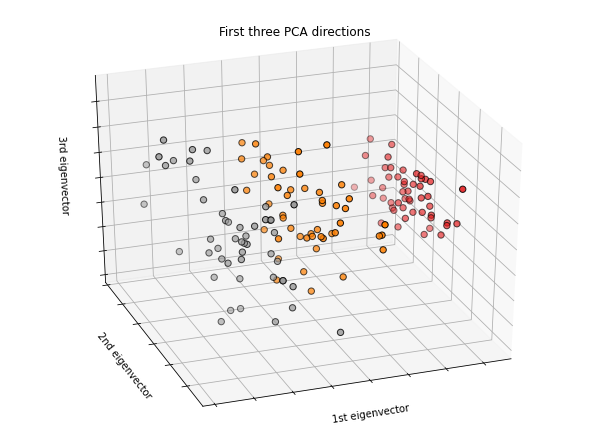

In [ ]:
algo=PCA(n_components=3)
algo.fit(iris.data)
print(algo.components_)
print(algo.explained_variance_ratio_)

X_reduced=algo.transform(iris.data)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

#[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
# [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]

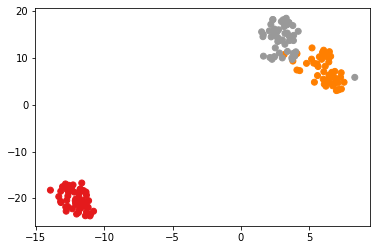

In [ ]:
#nice graphs
from sklearn.manifold import TSNE
X = iris.data
X_embedded = TSNE(n_components=2).fit_transform(X)
#print(X_embedded)
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y, cmap=plt.cm.Set1)

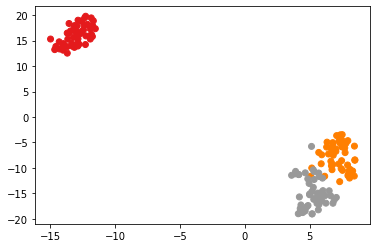

In [ ]:
X_embedded = TSNE(n_components=2).fit_transform(X_reduced)
#print(X_embedded)
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=y, cmap=plt.cm.Set1)

#Clustering

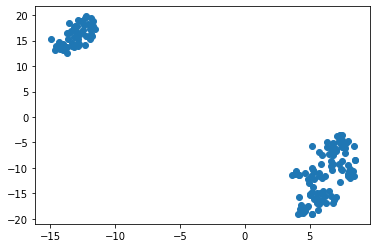

In [ ]:
plt.scatter(X_embedded[:,0],X_embedded[:,1])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  2  1  2  1  2  1  2  2  2  2  1  2  1  2  2  3  2  4  2
  4  1  1  1  1 -1  1  2  2  2  2  4  2  1  1  3  2  2  2  1  2  2  2  2
  2  1  2  2  4  4  4  4  4  4 -1  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4]


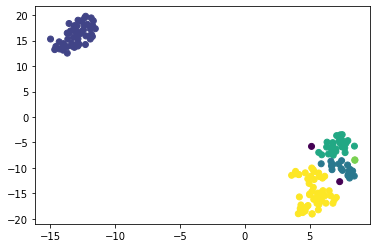

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
X = X_embedded
clustering = DBSCAN(eps=1, min_samples=2).fit(X)
print(clustering.labels_)
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=clustering.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1 -1  1 -1  1  1  1  3  1  4  1
  4  1  1  1  1  1  1  1  1  1  1  4  1  1  1  3  1  1  1  1  1  2  1  1
  1  1  2  1 -1  4  4  4  4  5 -1  6 -1 -1  4  4  4  4 -1  4  4 -1 -1 -1
  4  4  5  4  4  4  4  4  4  4  6 -1  4  4 -1 -1  4  4  4  4  4  4  4  4
  4  4  4  4  4  4]


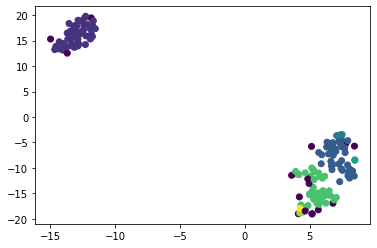

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
X = iris.data
clustering = DBSCAN(eps=0.4, min_samples=2).fit(X)
print(clustering.labels_)
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=clustering.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


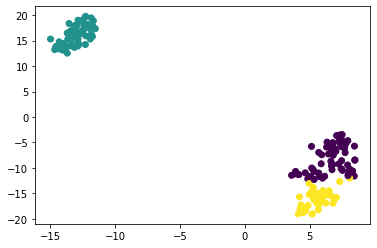

In [ ]:
from sklearn.cluster import KMeans
X = iris.data
clustering = KMeans(n_clusters=3).fit(X)
print(clustering.labels_)
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=clustering.labels_)

In [ ]:
#try spectral clustering

[]

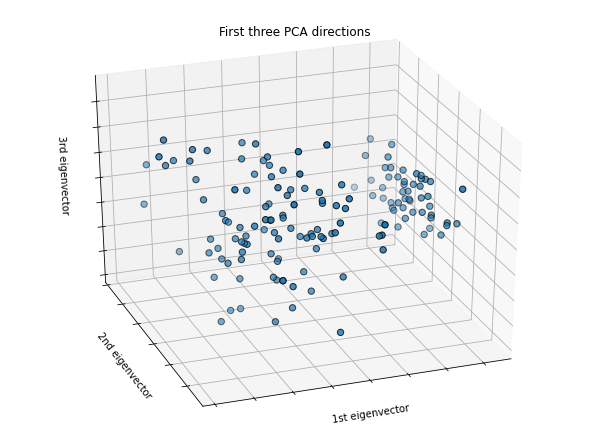

In [ ]:


fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

[]

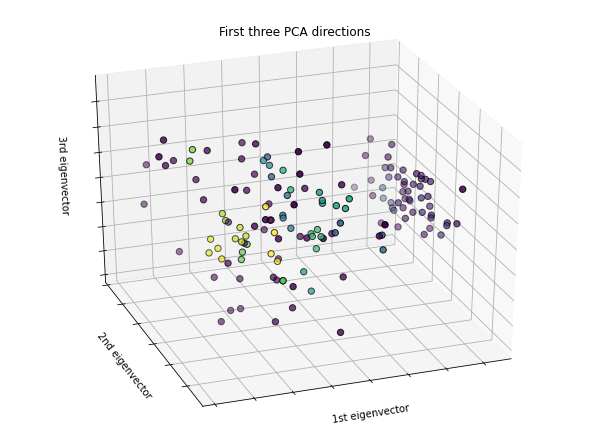

In [ ]:
X=X_reduced
clustering = DBSCAN(eps=0.2, min_samples=2).fit(X)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],c=clustering.labels_,edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])